# Holiday Package Prediction

## Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import statsmodels.stats.proportion as sp

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns


In [2]:
df = pd.read_csv('Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
df.shape

(4888, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

In [5]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

## Analysing freatures and target

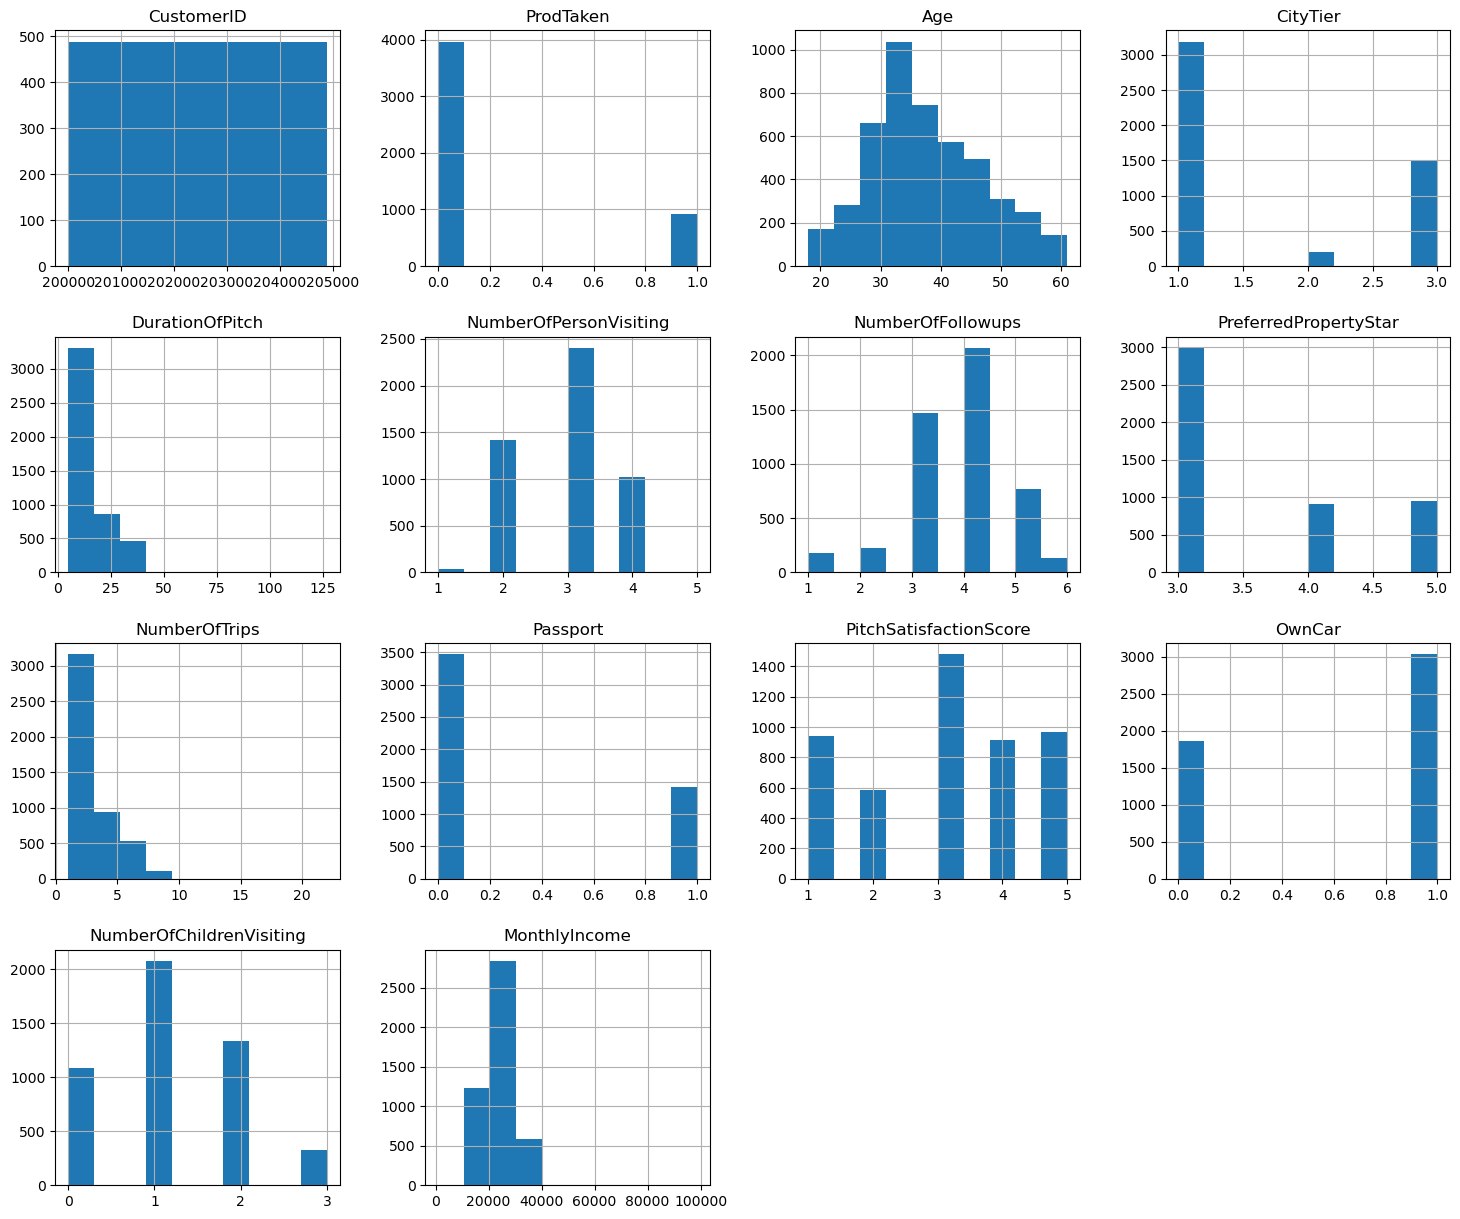

In [6]:
df.hist(figsize=(18,15))  # all graphs together
plt.show()

## Understanding data

In [7]:
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport',
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips',
       'NumberOfChildrenVisiting', 'MonthlyIncome']

In [8]:
df[nums].describe()

,CustomerID,Age,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4637.000000,4888.000000,4843.000000,4748.000000,4822.000000,4655.000000
mean,202443.500000,37.622265,15.490835,2.905074,3.708445,3.236521,1.187267,23619.853491
std,1411.188388,9.316387,8.519643,0.724891,1.002509,1.849019,0.857861,5380.698361
min,200000.000000,18.000000,5.000000,1.000000,1.000000,1.000000,0.000000,1000.000000
25%,201221.750000,31.000000,9.000000,2.000000,3.000000,2.000000,1.000000,20346.000000
50%,202443.500000,36.000000,13.000000,3.000000,4.000000,3.000000,1.000000,22347.000000
75%,203665.250000,44.000000,20.000000,3.000000,4.000000,4.000000,2.000000,25571.000000
max,204887.000000,61.000000,127.000000,5.000000,6.000000,22.000000,3.000000,98678.000000


In [9]:
df[cats].describe()

,ProdTaken,CityTier,PreferredPropertyStar,Passport,OwnCar,PitchSatisfactionScore
count,4888.000000,4888.000000,4862.000000,4888.000000,4888.000000,4888.000000
mean,0.188216,1.654255,3.581037,0.290917,0.620295,3.078151
std,0.390925,0.916583,0.798009,0.454232,0.485363,1.365792
min,0.000000,1.000000,3.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,3.000000,0.000000,0.000000,2.000000
50%,0.000000,1.000000,3.000000,0.000000,1.000000,3.000000
75%,0.000000,3.000000,4.000000,1.000000,1.000000,4.000000
max,1.000000,3.000000,5.000000,1.000000,1.000000,5.000000


In [10]:
# category

In [11]:
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}: {x}')

ProdTaken: [1 0]
CityTier: [3 1 2]
PreferredPropertyStar: [ 3.  4.  5. nan]
Passport: [1 0]
OwnCar: [1 0]
PitchSatisfactionScore: [2 3 5 4 1]
TypeofContact: ['Self Enquiry' 'Company Invited' nan]
Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']
Gender: ['Female' 'Male' 'Fe Male']
ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']
MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']
Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']


C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\1414698725.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\1414698725.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\1414698725.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\1414698725.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\1414698725.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\1414698725.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\1414698725.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppDa

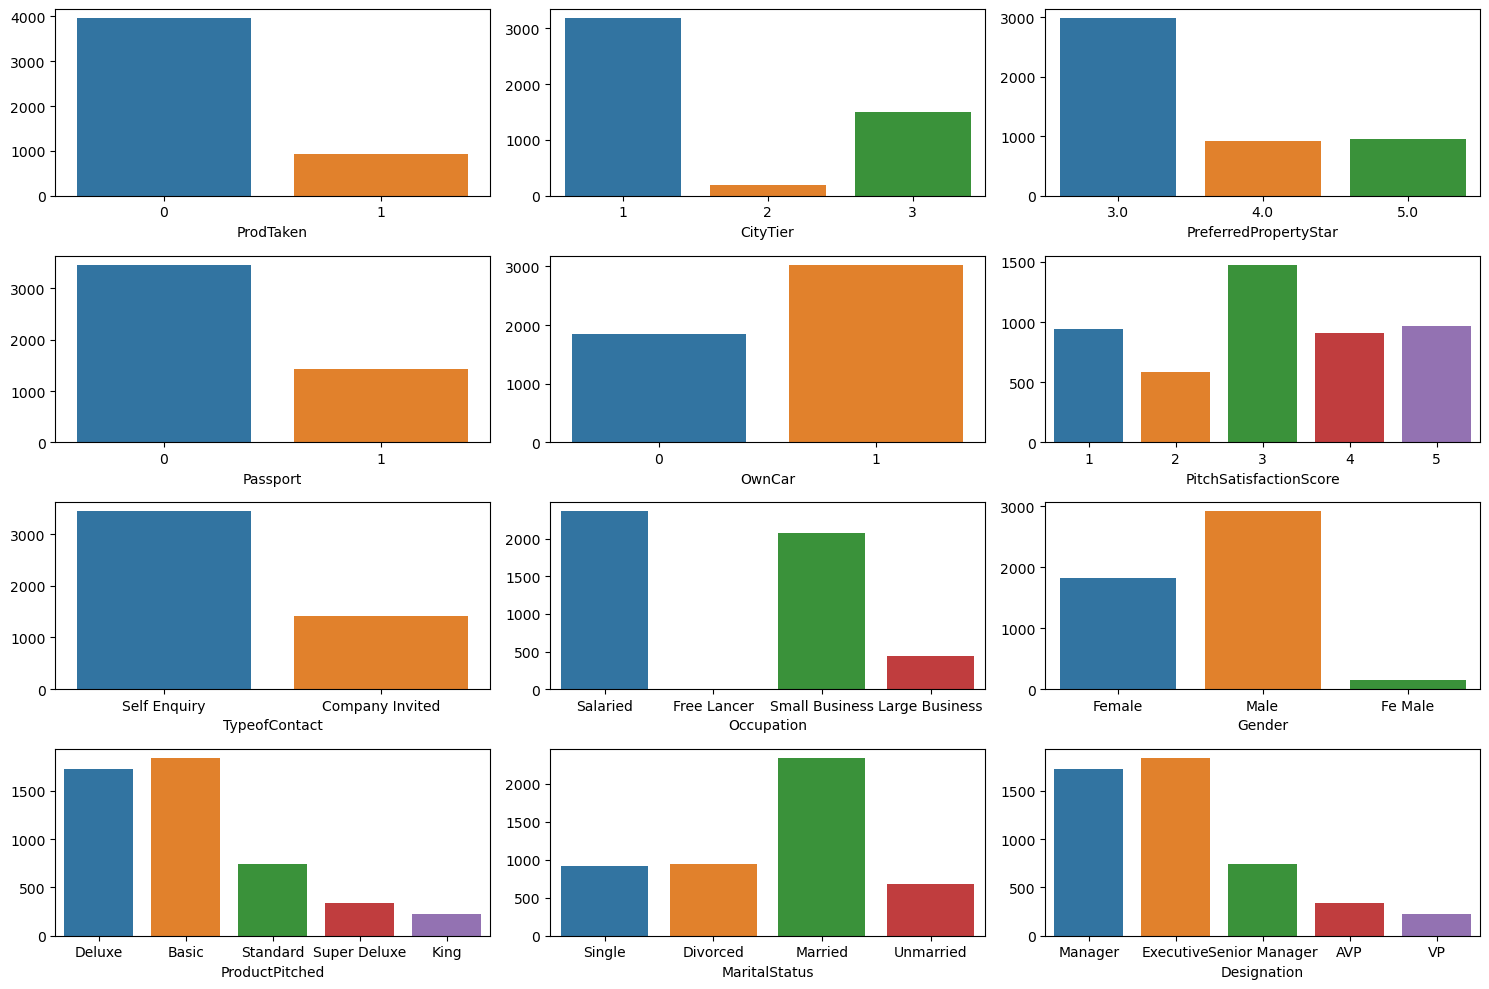

In [12]:
plt.figure(figsize=(15,10))
for i, col in enumerate(cats):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[col])
    plt.ylabel('')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

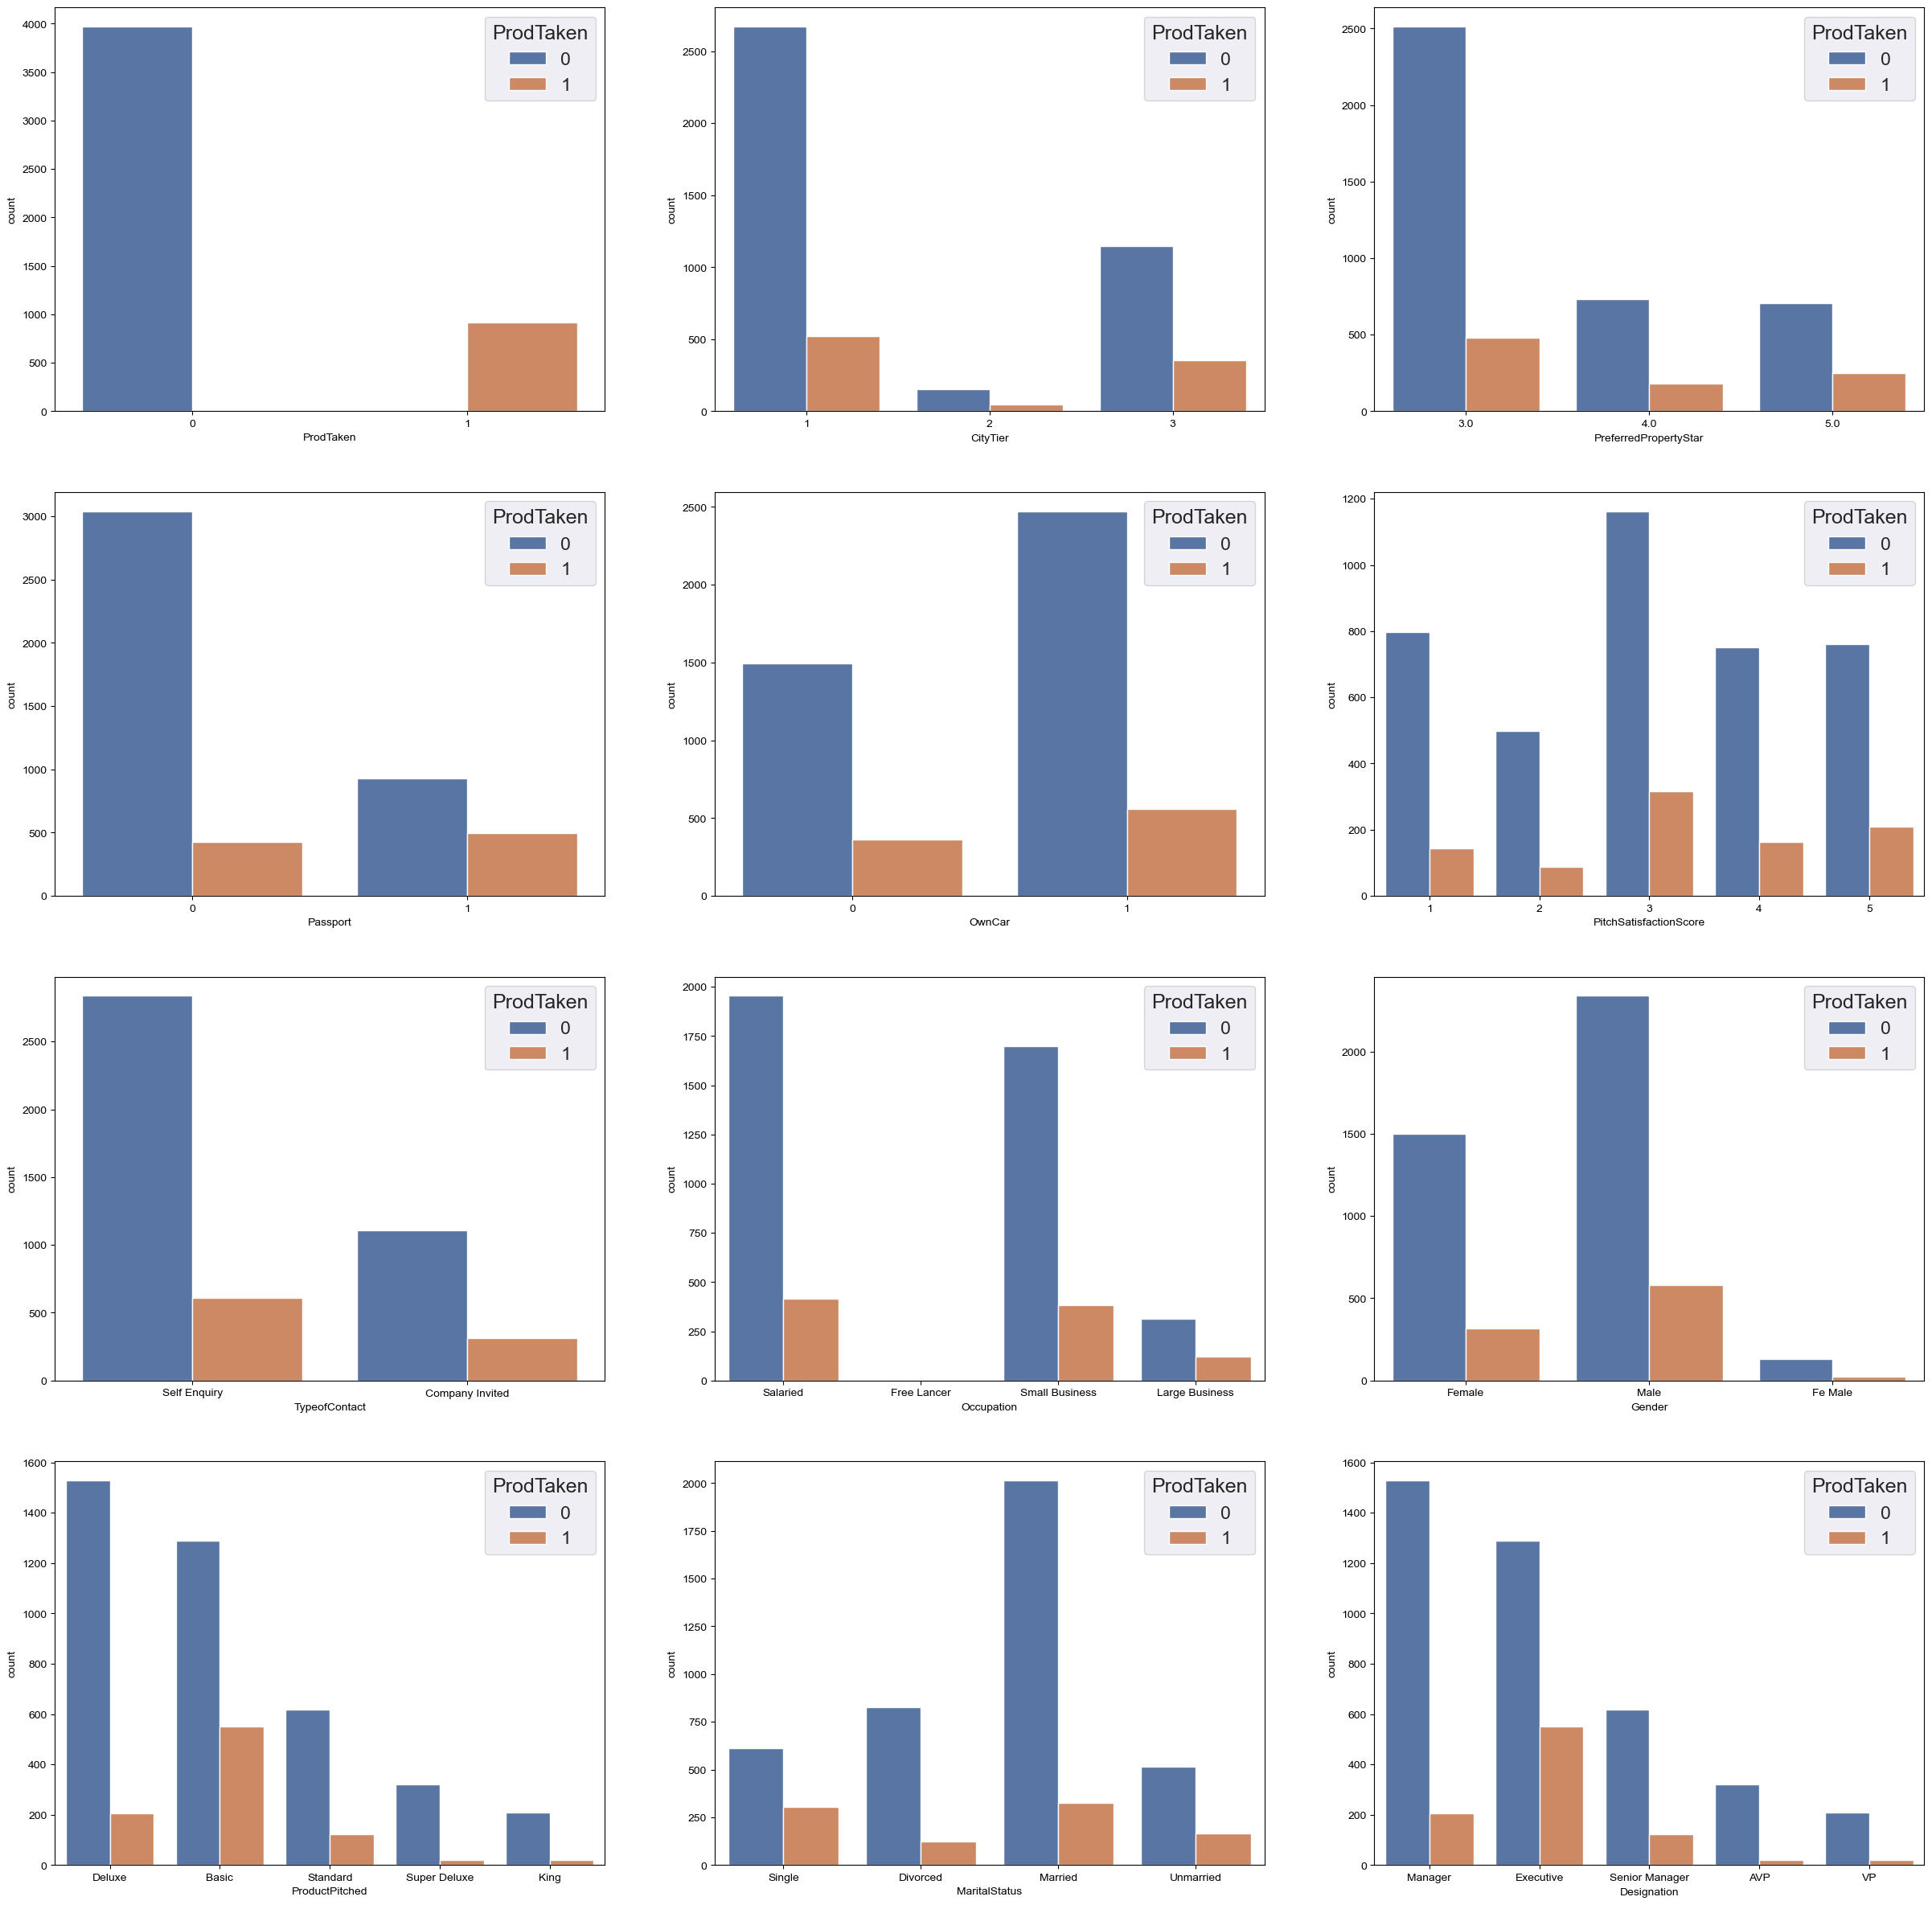

In [13]:
fig, ax = plt.subplots(4,3, figsize=(30, 30))
i=0
sns.set(font_scale = 1.5)
for col in cats: 
    sns.countplot(x=col, hue='ProdTaken', data =df, ax=ax[i//3][i%3])
    i=i+1
plt.show()

In [14]:
df.Gender.value_counts()
df.Gender = df.Gender.replace('Fe Male', 'Female')

In [15]:
df.MaritalStatus.value_counts()
df.MaritalStatus = df.MaritalStatus.replace('Single', 'Unmarried')

In [16]:
#numeric 

C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\779476981.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\779476981.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\779476981.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\779476981.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\779476981.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\779476981.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


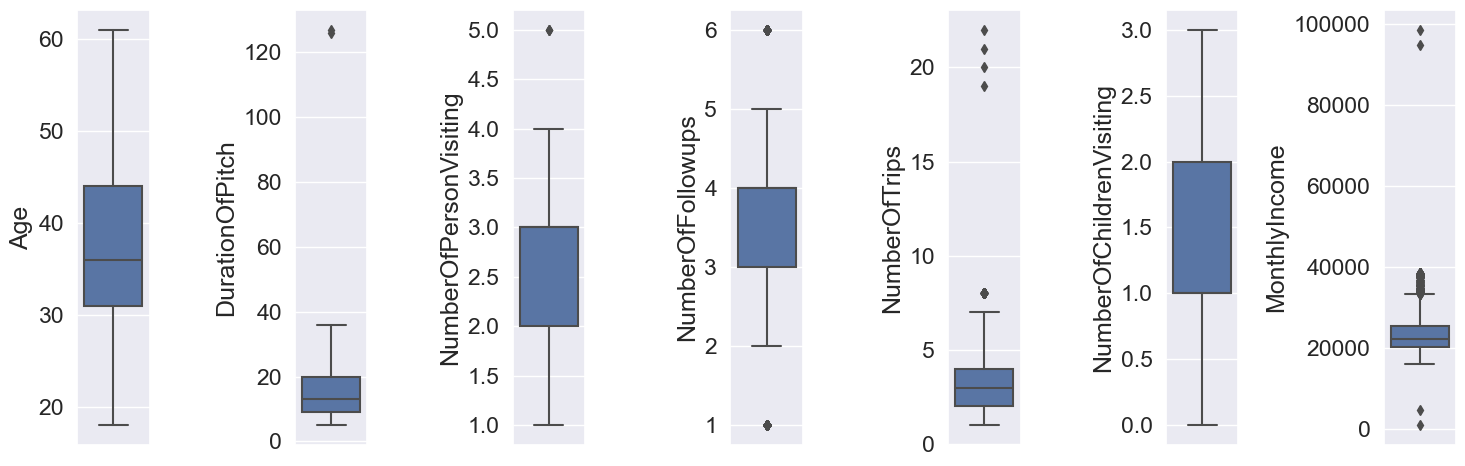

In [17]:
plt.figure(figsize=(15,5))
for i in range(1, len(nums)):
    plt.subplot(1, 7, i)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()
plt.show()


C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\2158159270.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]])
C:\Users\Ankur\AppData\Local\Temp\ipykernel_22248\2158159270.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[nums[i]])
C:\Users\Ankur\AppData\Local\Temp\ipykernel_

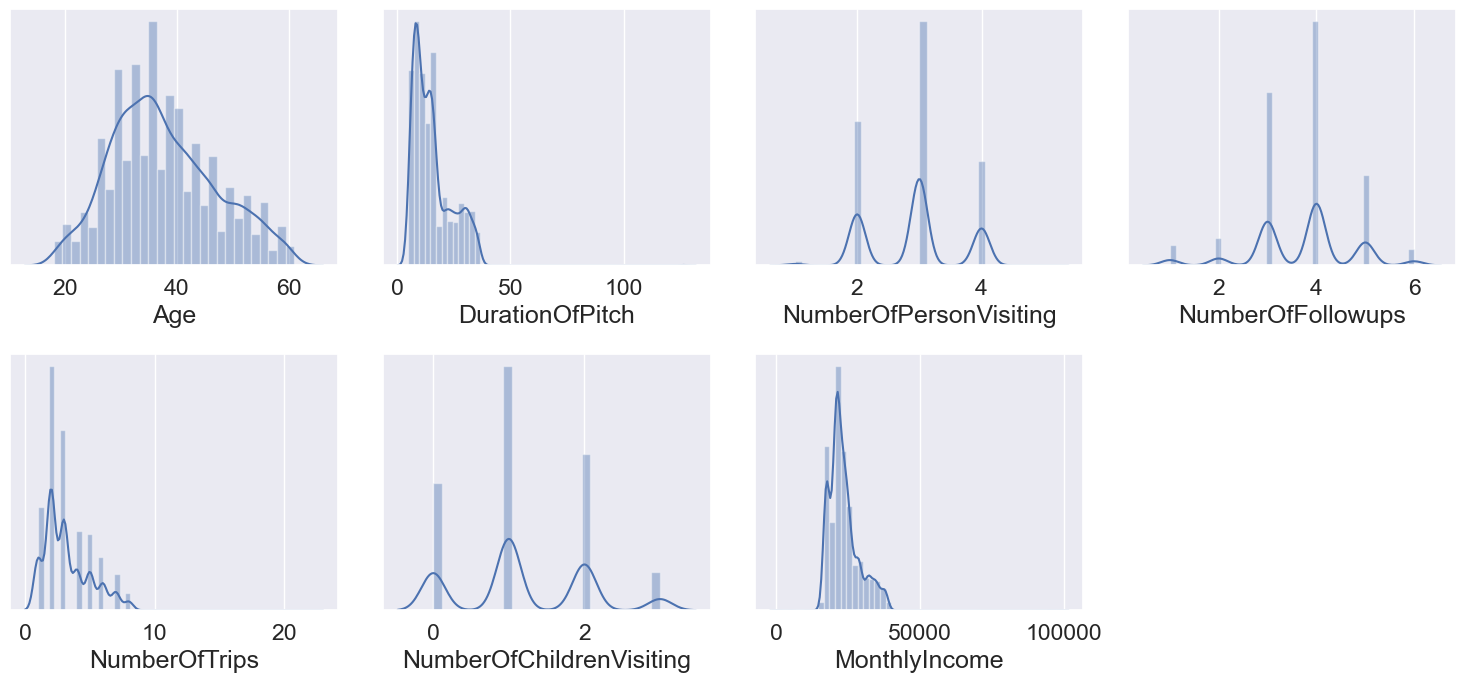

In [18]:
plt.figure(figsize=(15,10))
for i in range(1, len(nums)):
    plt.subplot(3, 4, i)
    sns.distplot(df[nums[i]])
    plt.ylabel('')
    plt.yticks([])
    plt.tight_layout()

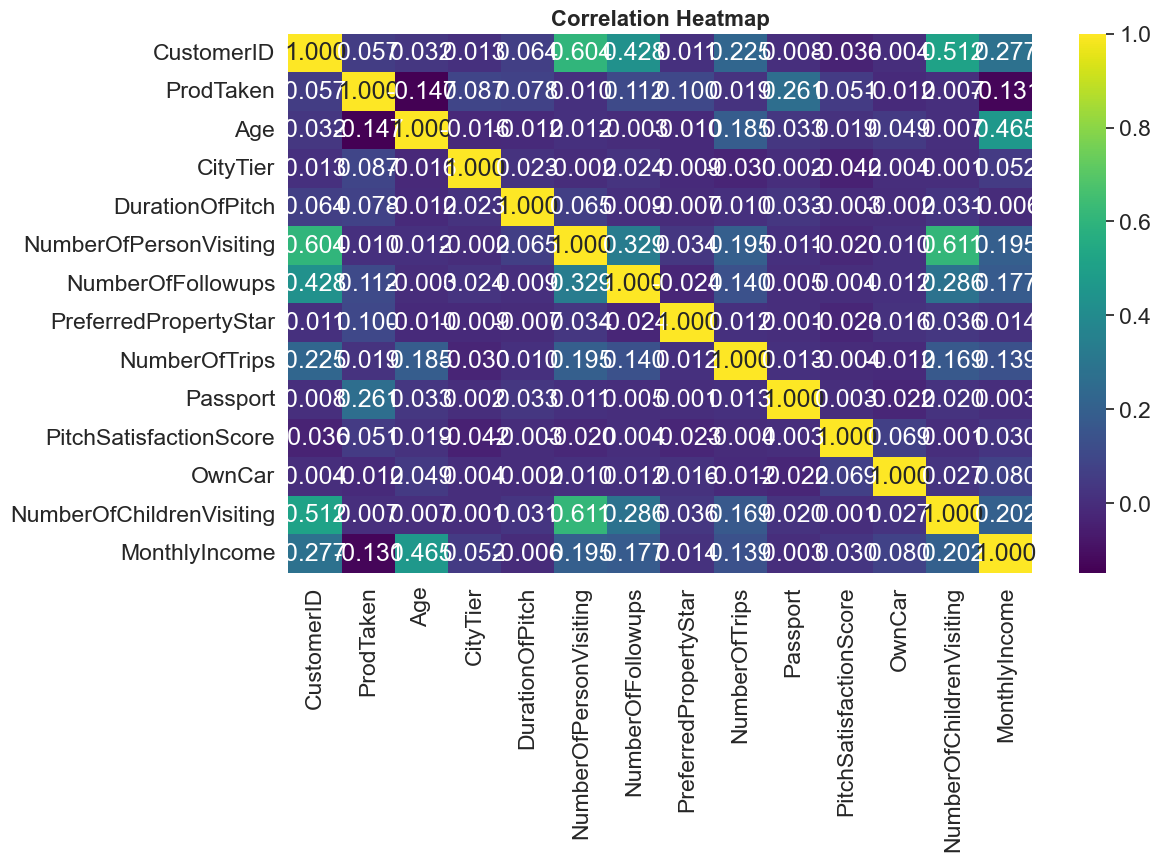

In [19]:
numeric_columns = df.select_dtypes(include='number')
plt.figure(figsize=(12,7))
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
sns.heatmap(numeric_columns.corr(), cmap='viridis', annot=True, fmt='.3f')
plt.show()

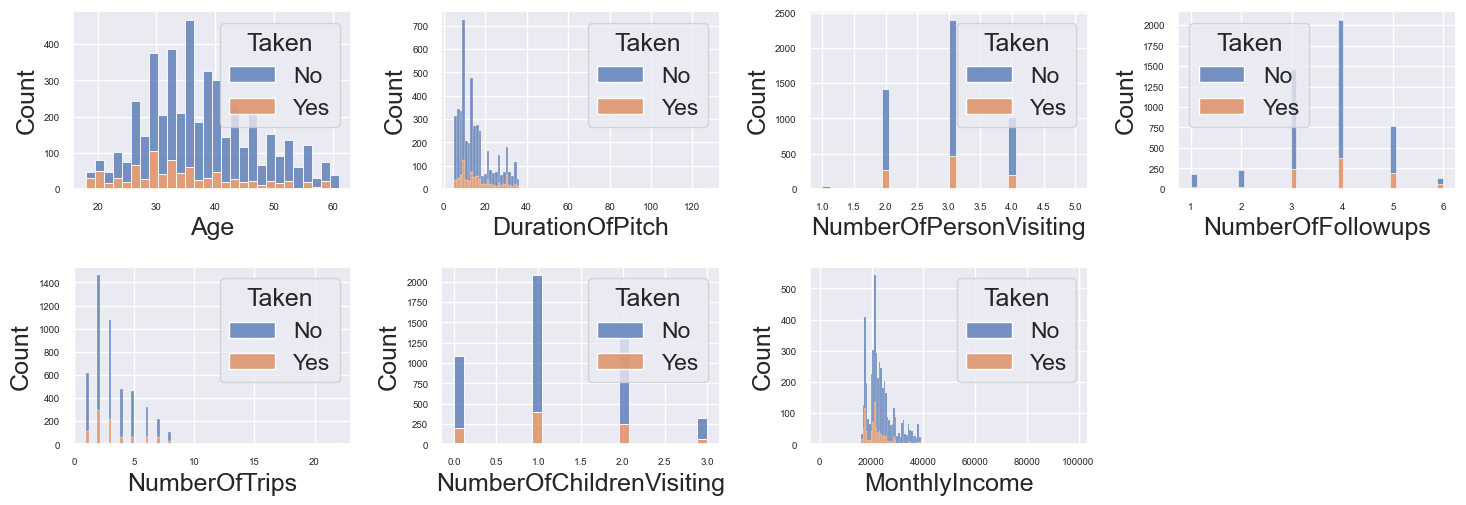

In [20]:
plt.figure(figsize=(15,10))
for i, col in enumerate(nums[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)
    sns.histplot(data=df, x=col, hue='ProdTaken', multiple='stack')
    
    legend = plt.gca().get_legend()
    legend.set_title('Taken')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')

plt.tight_layout()

plt.show()




In [21]:
features_with_na = [features for features in df.columns if df[features].isnull().sum()>=1]
for features in features_with_na:
    print(features,np.round(df[features].isnull().mean()*100,5), '% missing values') 

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [22]:
df[features_with_na].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [23]:
df.MonthlyIncome.value_counts()

MonthlyIncome
20855.0    7
21288.0    7
17342.0    7
21020.0    7
24950.0    6
          ..
17074.0    1
24250.0    1
21077.0    1
24714.0    1
21471.0    1
Name: count, Length: 2475, dtype: int64

In [24]:
# Imputing Null Values

#Age 
df.Age.fillna(df.Age.median(), inplace=True)

#Type of Contact
df.TypeofContact.fillna(df.TypeofContact.mode()[0], inplace=True)

#DurationOfPitch
df.DurationOfPitch.fillna(df.DurationOfPitch.median(), inplace=True)

#NumberOfFollowups
df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0], inplace=True)

#PreferredPropertyStar
df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0], inplace=True)

#NumberOfTrips
df.NumberOfTrips.fillna(df.NumberOfTrips.median(), inplace=True)

#NumberOfChildrenVisiting
df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0], inplace=True)

#MonthlyIncome
df.MonthlyIncome.fillna(df.MonthlyIncome.median(), inplace=True)

In [25]:
df.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [26]:
df.drop('CustomerID', inplace=True, axis=1)

In [27]:
df.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [28]:
# We will create a new column TotalVisiting that will be addition of two columns i.e. NumberOfPersonVisiting and NumberOfChildrenVisiting
df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting', 'NumberOfChildrenVisiting'], axis=1, inplace=True)

In [29]:
# Numerical Features

num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print("Number of Numerical Features are: ", len(num_features))

Number of Numerical Features are:  12


In [30]:
# Categorical Features

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print("Number of Categorical Features are: ", len(cat_features))

Number of Categorical Features are:  6


In [31]:
discrete_features = [feature for feature in num_features if len(df[feature].unique()) <= 25]
print("Number of Discrete Features are: ", len(discrete_features))

Number of Discrete Features are:  9


In [32]:
# Continuous Features

continuous_features = [feature for feature in num_features if feature not in discrete_features]
print("Number of Continuous Features are: ", len(continuous_features))

Number of Continuous Features are:  3


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ProdTaken               4888 non-null   int64  
 1   Age                     4888 non-null   float64
 2   TypeofContact           4888 non-null   object 
 3   CityTier                4888 non-null   int64  
 4   DurationOfPitch         4888 non-null   float64
 5   Occupation              4888 non-null   object 
 6   Gender                  4888 non-null   object 
 7   NumberOfFollowups       4888 non-null   float64
 8   ProductPitched          4888 non-null   object 
 9   PreferredPropertyStar   4888 non-null   float64
 10  MaritalStatus           4888 non-null   object 
 11  NumberOfTrips           4888 non-null   float64
 12  Passport                4888 non-null   int64  
 13  PitchSatisfactionScore  4888 non-null   int64  
 14  OwnCar                  4888 non-null   

In [34]:
df.sample(4)

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
1410,0,40.0,Self Enquiry,3,8.0,Small Business,Female,3.0,Deluxe,4.0,Married,4.0,0,3,1,Manager,20677.0,4.0
513,1,20.0,Self Enquiry,1,16.0,Small Business,Male,3.0,Basic,3.0,Unmarried,2.0,1,5,0,Executive,16009.0,2.0
997,1,27.0,Self Enquiry,1,23.0,Salaried,Female,3.0,Basic,3.0,Unmarried,2.0,1,5,1,Executive,17394.0,2.0
323,1,36.0,Self Enquiry,1,8.0,Small Business,Male,5.0,Basic,3.0,Divorced,6.0,1,3,1,Executive,18464.0,2.0


In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['ProdTaken'], axis=1)
y = df['ProdTaken']

In [36]:
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
X_train_orig.shape, X_test_orig.shape

((3910, 17), (978, 17))

In [38]:
cat_features =  X_train_orig.select_dtypes(include='object').columns
num_features =   X_train_orig.select_dtypes(exclude='object').columns


print(cat_features)
print(num_features)


Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')
Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object')


In [39]:
X_train_orig

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
3995,36.0,Self Enquiry,1,7.0,Small Business,Male,5.0,Basic,3.0,Unmarried,3.0,0,4,1,Executive,21537.0,3.0
2610,42.0,Self Enquiry,1,21.0,Salaried,Male,4.0,Basic,3.0,Married,6.0,0,4,1,Executive,21129.0,5.0
3083,50.0,Self Enquiry,1,7.0,Large Business,Female,4.0,Basic,5.0,Divorced,4.0,0,4,1,Executive,22258.0,4.0
3973,38.0,Self Enquiry,1,7.0,Salaried,Male,5.0,Deluxe,3.0,Married,3.0,0,5,0,Manager,24671.0,4.0
4044,44.0,Company Invited,1,35.0,Small Business,Female,2.0,Basic,3.0,Unmarried,6.0,0,3,0,Executive,23417.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,28.0,Self Enquiry,1,10.0,Small Business,Male,5.0,Basic,3.0,Unmarried,2.0,0,1,1,Executive,20723.0,5.0
466,41.0,Self Enquiry,3,8.0,Salaried,Female,3.0,Super Deluxe,5.0,Divorced,1.0,0,5,1,AVP,31595.0,4.0
3092,38.0,Company Invited,3,28.0,Small Business,Female,4.0,Basic,3.0,Divorced,7.0,0,2,1,Executive,21651.0,5.0
3772,28.0,Self Enquiry,3,30.0,Small Business,Female,5.0,Deluxe,3.0,Married,3.0,0,1,1,Manager,22218.0,5.0


In [40]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer



numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [41]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder', OneHotEncoder(drop='first'),
                                 Index(['TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
       'MaritalStatus', 'Designation'],
      dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 Index(['Age', 'CityTier', 'DurationOfPitch', 'NumberOfFollowups',
       'PreferredPropertyStar', 'NumberOfTrips', 'Passport',
       'PitchSatisfactionScore', 'OwnCar', 'MonthlyIncome', 'TotalVisiting'],
      dtype='object'))])

In [42]:
X_train = preprocessor.fit_transform(X_train_orig)
y_train= y_train_orig

In [43]:
X_test = preprocessor.transform(X_test_orig)
y_test=y_test_orig

In [44]:
X_train
y_train

3995    0
2610    0
3083    0
3973    0
4044    0
       ..
4426    0
466     0
3092    0
3772    0
860     1
Name: ProdTaken, Length: 3910, dtype: int64

In [60]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

from sklearn import svm


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier(),
    "SVC": svm.LinearSVC()
    
}

for i in range(len(list(models))):
    model = list(models.values())[i]
   
    model.fit(X_train, y_train)
  
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    
    #Testing set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    
    print(list(models.keys())[i],": ")
    
    print('Model performance for Training set:')
    print('Accuracy: {:.4f}'.format(model_train_accuracy))
    print('F1 Score: {:.4f}'.format(model_train_f1))
    print('Precision: {:.4f}'.format(model_train_precision))
    print('Recall: {:.4f}\n'.format(model_train_recall))
    
    print('Model performance for Testing set:')
    print('Accuracy: {:.4f}'.format(model_test_accuracy))
    print('F1 Score: {:.4f}'.format(model_test_f1))
    print('Precision: {:.4f}'.format(model_test_precision))
    print('Recall: {:.4f}'.format(model_test_recall))
    
    print('='*35)
    print('\n')

Logistic Regression : 
Model performance for Training set:
Accuracy: 0.8458
F1 Score: 0.4230
Precision: 0.6994
Recall: 0.3032

Model performance for Testing set:
Accuracy: 0.8354
F1 Score: 0.4103
Precision: 0.6829
Recall: 0.2932


Decision Tree : 
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000

Model performance for Testing set:
Accuracy: 0.9110
F1 Score: 0.7668
Precision: 0.7857
Recall: 0.7487


Random Forest : 
Model performance for Training set:
Accuracy: 1.0000
F1 Score: 1.0000
Precision: 1.0000
Recall: 1.0000

Model performance for Testing set:
Accuracy: 0.9325
F1 Score: 0.7950
Precision: 0.9771
Recall: 0.6702


Bagging : 
Model performance for Training set:
Accuracy: 0.9949
F1 Score: 0.9861
Precision: 0.9972
Recall: 0.9753

Model performance for Testing set:
Accuracy: 0.9284
F1 Score: 0.7917
Precision: 0.9172
Recall: 0.6963


SVC : 
Model performance for Training set:
Accuracy: 0.8407
F1 Score: 0.3571
Precision: 0.7208
Recal

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression()
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       787
           1       0.68      0.29      0.41       191

    accuracy                           0.84       978
   macro avg       0.77      0.63      0.66       978
weighted avg       0.82      0.84      0.81       978

[[0.91725744 0.08274256]
 [0.81941323 0.18058677]
 [0.88753582 0.11246418]
 ...
 [0.35878181 0.64121819]
 [0.95757023 0.04242977]
 [0.89756565 0.10243435]]


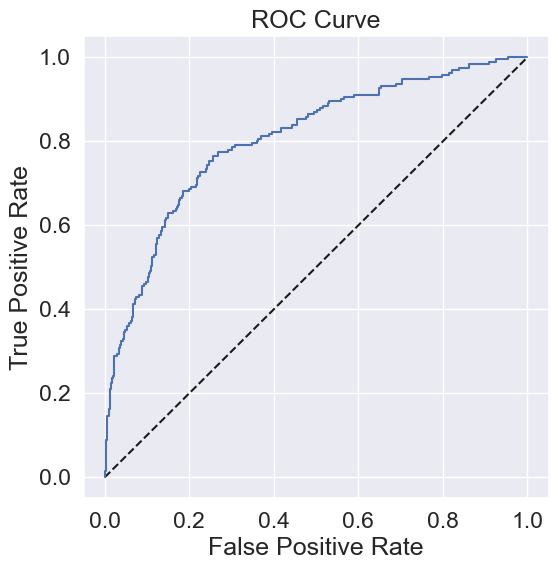

DecisionTreeClassifier()
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       787
           1       0.81      0.78      0.79       191

    accuracy                           0.92       978
   macro avg       0.88      0.87      0.87       978
weighted avg       0.92      0.92      0.92       978

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [1. 0.]
 [1. 0.]]


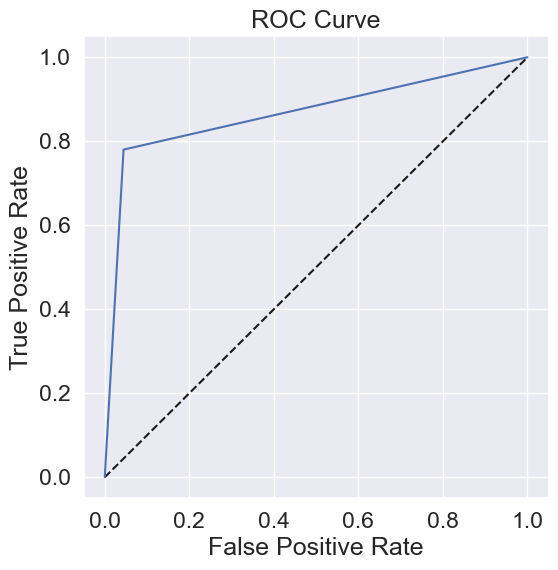

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       787
           1       0.97      0.65      0.78       191

    accuracy                           0.93       978
   macro avg       0.95      0.82      0.87       978
weighted avg       0.93      0.93      0.92       978

[[0.78 0.22]
 [0.98 0.02]
 [0.98 0.02]
 ...
 [0.4  0.6 ]
 [0.95 0.05]
 [0.87 0.13]]


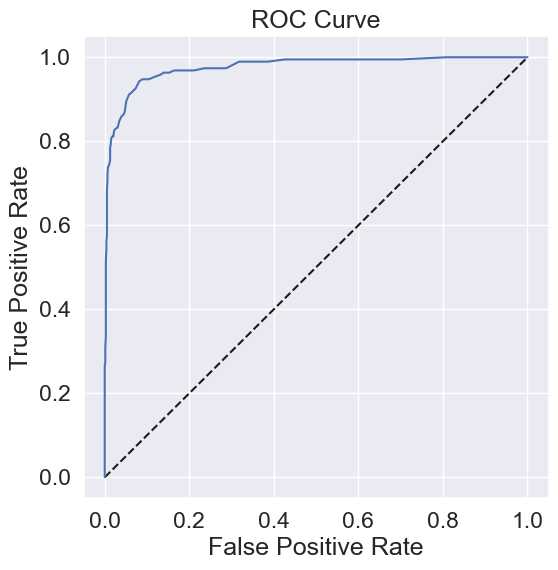

BaggingClassifier()
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       787
           1       0.93      0.72      0.81       191

    accuracy                           0.93       978
   macro avg       0.93      0.85      0.88       978
weighted avg       0.93      0.93      0.93       978

[[0.7 0.3]
 [0.9 0.1]
 [1.  0. ]
 ...
 [0.5 0.5]
 [1.  0. ]
 [1.  0. ]]


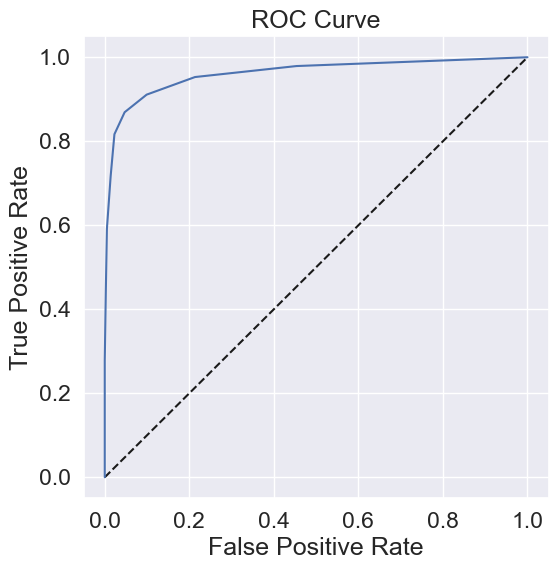

In [61]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn import svm
from sklearn. metrics import classification_report
    
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Bagging": BaggingClassifier()
    
}

for i in range(len(list(models))):
    
    
    
    
    model = list(models.values())[i]
    
    print (model)
    
    mode = model.fit(X_train, y_train)

    preds = mode.predict(X_test)
    print(classification_report(y_test, preds))
    
    y_scores = model.predict_proba(X_test)
    print(y_scores)

    # calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [68]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('success')

success


In [71]:
from sklearn.model_selection import  cross_val_score,  RepeatedStratifiedKFold
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
scores = cross_val_score(rf, X_train, y_train, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)

# print the mean AUROC score
print('Mean AUROC: %.4f' % (AUROC))

Mean AUROC: 0.9526


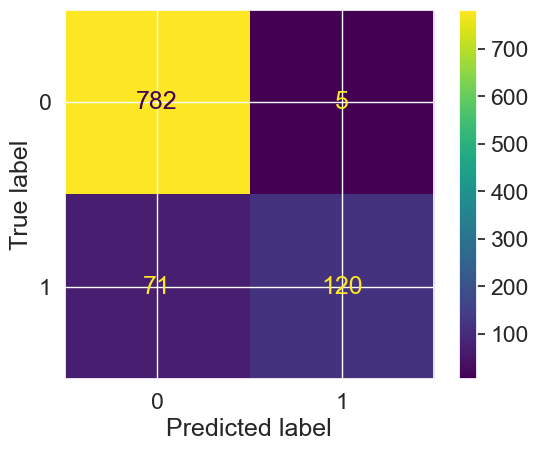

In [72]:
from sklearn.metrics import ConfusionMatrixDisplay

y_hat_test = rf.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_hat_test)



In [62]:
rf_params = {
    "max_depth": [5,8,15,None, 10],
    "max_features": [5,7,"auto",8],
    "min_samples_split": [2,8,15,20],
    "n_estimators": [100,200,500,1000]
}



In [63]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [64]:
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_params)
]

In [65]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [66]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, 
                                param_distributions=params,
                                n_iter=100,
                               cv=3, 
                               verbose=2,
                               n_jobs=-1)
    
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"----------Best Params for {model_name}-----------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
69 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

----------Best Params for RF-----------
{'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}


In [67]:
from sklearn.ensemble import RandomForestClassifier

RForestC = RandomForestClassifier(max_depth=None, 
                                    max_features=8, 
                                    min_samples_split= 2, 
                                    n_estimators=100)
RForest= RForestC.fit(X_train, y_train)
preds = RForest.predict(X_test)
print('accuracy', accuracy_score(y_test, preds))
print('recall', recall_score(y_test, preds))
print('precision', precision_score(y_test, preds))
print('f1-score', f1_score(y_test, preds))
print(classification_report(y_test, preds))

accuracy 0.9325153374233128
recall 0.6963350785340314
precision 0.9432624113475178
f1-score 0.8012048192771084
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       787
           1       0.94      0.70      0.80       191

    accuracy                           0.93       978
   macro avg       0.94      0.84      0.88       978
weighted avg       0.93      0.93      0.93       978

